## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlite3
from scipy import stats

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103745 entries, 0 to 103744
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         103745 non-null  int64  
 1   primary_title      103745 non-null  object 
 2   averagerating      103745 non-null  float64
 3   death_year         103745 non-null  float64
 4   domestic_gross     103745 non-null  float64
 5   foreign_gross      103745 non-null  float64
 6   genres             103745 non-null  object 
 7   movie_id           103745 non-null  object 
 8   numvotes           103745 non-null  float64
 9   original_language  103745 non-null  object 
 10  popularity         103745 non-null  float64
 11  primary_name       103745 non-null  object 
 12  production_budget  103745 non-null  float64
 13  region             103745 non-null  object 
 14  release_date_x     103745 non-null  object 
 15  runtime_minutes    103745 non-null  float64
 16  st

# Data Analysis

##### Comparing Top 10 & Least 10 Genres by Average Rating

In [4]:
# Group the data by genre and calculate the average rating for each genre
average_rating = df.groupby('genres')['averagerating'].mean().reset_index()


#Sort the values in descending order to get the top 10
average_rating = average_rating.sort_values(by='averagerating', ascending=False)

#Display top 10 genres
top_10_genres = average_rating.head(10)

#Display 10 worst genres
least_10_genres = average_rating.tail(10)

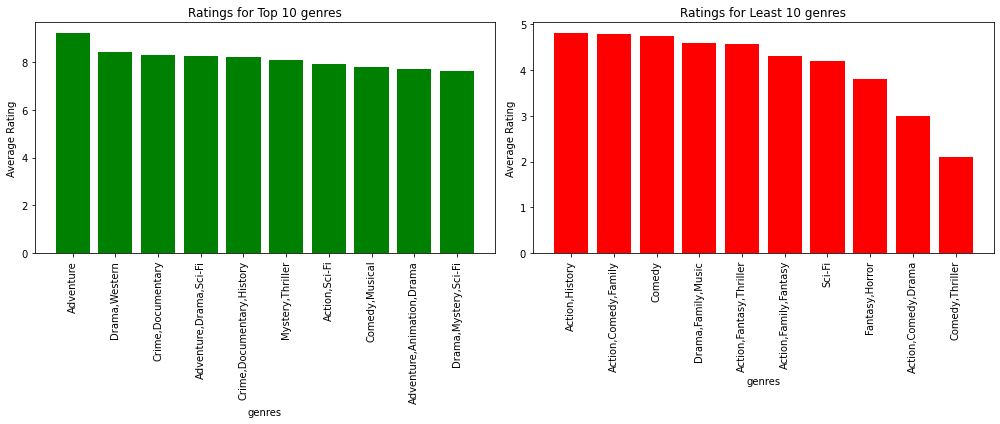

In [5]:
# Plot 2 bar graphs (one showing 10 best rated genres, and another showing 10 worst rated genres)

#Bar graph showing 10 best rated genres
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_genres['genres'], top_10_genres['averagerating'], color='green')
axs[0].set_xlabel ('genres')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Ratings for Top 10 genres')
axs[0].tick_params(axis='x', rotation=90)


#Bar graph showing 10 worst rated genres
axs[1].bar(least_10_genres['genres'], least_10_genres['averagerating'], color = 'red')
axs[1].set_xlabel ('genres')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Ratings for Least 10 genres')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()  
plt.show()

As seen in the charts above, the adventure genre stands out as the highest-rated category among the genres analyzed. This suggests a strong audience preference and engagement with adventure films, indicating a significant opportunity for investment in this genre. Conversely, the Comedy-Thriller genre displayed disappointing ratings.It may be prudent to approach investments in the Comedy-Thriller genre with caution.

#### Production budget vs foreign gross

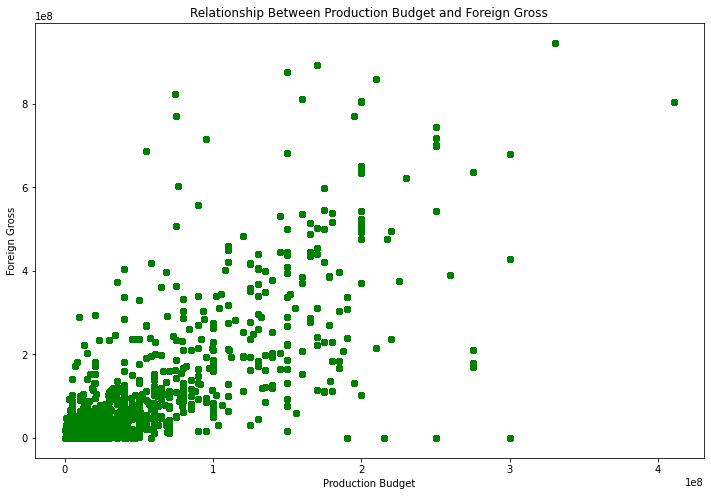

In [6]:
# Plot a scatter graph to show the relationship between production budget and foreign gross revenue

fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(df['production_budget'], df['foreign_gross'], alpha=0.5, color='green')
plt.xlabel('Production Budget')
plt.ylabel('Foreign Gross')
plt.title('Relationship Between Production Budget and Foreign Gross')
plt.show()

The scatter plot indicates an average positive correlation between the production budget and foreign gross income. This suggests that higher investment in production often translates to better financial performance of the movie.

####  Trend showing number of movies released each year

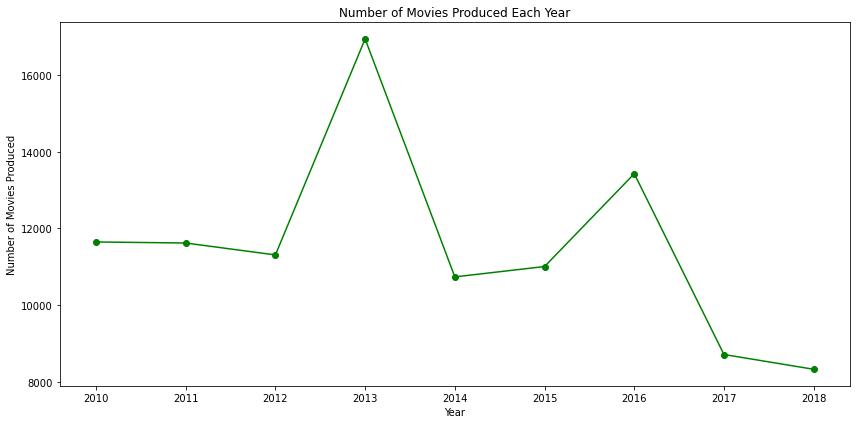

In [8]:
# Group data by 'year'

movies_per_year = df.groupby('year')['movie_id'].count()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year, marker='o', color='green', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.title('Number of Movies Produced Each Year')
plt.xticks(rotation= 0)
plt.tight_layout()  
plt.show()

The data reveals that the number of movies released reached its highest point in 2013. Following the peak in 2013, there has been a noticeable decline in the number of movies released each year. Further investigation is needed to understand the cause of decline in production

#### Average Production Budget Over Time

In [ ]:
# Group data by year then find average production budget in each year
avg_budget_per_year = df.groupby('year')['production_budget'].mean()

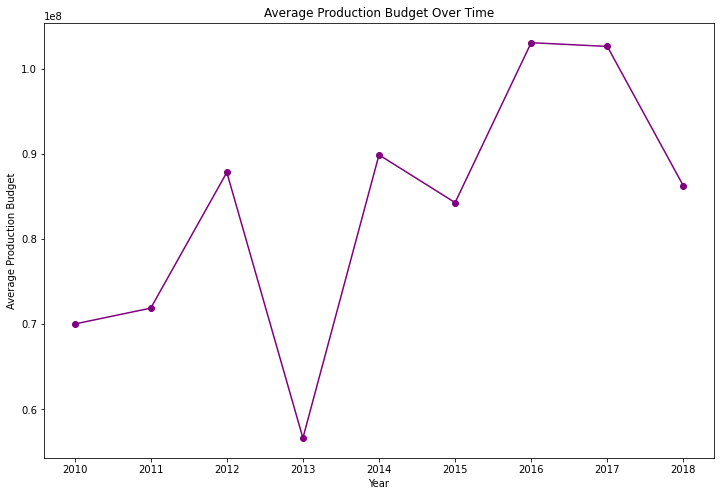

In [14]:
# Plot line graph showing average production over time

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(avg_budget_per_year, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget Over Time')
plt.show()

##### Top 10 Writers with the Best Rated Movies

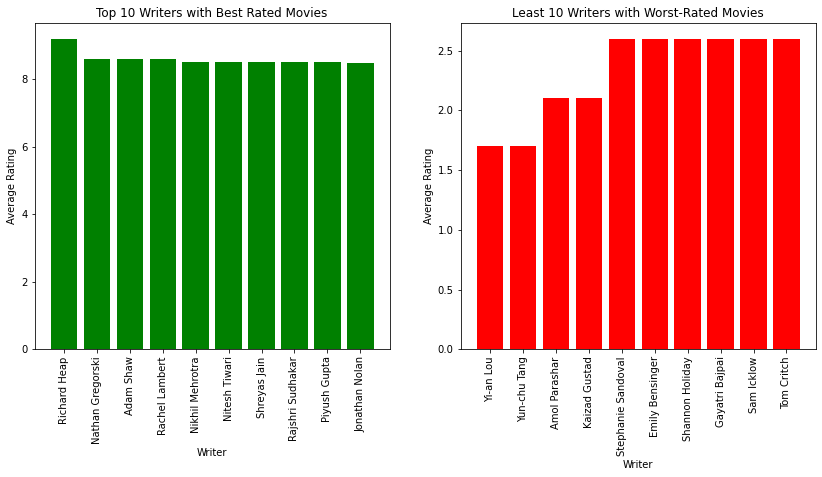

In [9]:
# Group data by writers and calculate average rating of each writers movies
top_writers = df.groupby('writer')['averagerating'].mean().reset_index()

#Sort the values to get the top 10 writers with the best ratings
top_writers = top_writers.sort_values(by='averagerating', ascending=False)
poor_writers = top_writers.sort_values(by='averagerating', ascending=True)

# Top 10 writers
top_10_writers = top_writers.head(10)
least_10_writers = poor_writers.head(10)

# Plot 2 graphs (one showing writers with the best rated movies, the other showing writers with poorly rated movies)
fig, axs = plt.subplots(1,2, figsize=(14, 6))
axs[0].bar(top_10_writers['writer'], top_10_writers['averagerating'], color='green')
axs[0].set_xlabel('Writer')
axs[0].set_ylabel('Average Rating')
axs[0].set_title('Top 10 Writers with Best Rated Movies')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(least_10_writers['writer'], least_10_writers['averagerating'], color='red')
axs[1].set_xlabel('Writer')
axs[1].set_ylabel('Average Rating')
axs[1].set_title('Least 10 Writers with Worst-Rated Movies')
axs[1].tick_params(axis='x', rotation=90)

plt.show()


The data identifies Richard Heap as a particularly strong candidate for collaboration, given his consistent high ratings.his experience aligns well with the studio's goals of maximizing the success and appeal of its films. In contrast, Yi-an Lou and Yun-chu Tang are writers whose work has generally not performed as well. It may be beneficial for the studio to be selective in collaborating with these writers until their work shows more promise.

##### Distribution of Movie Production Budgets

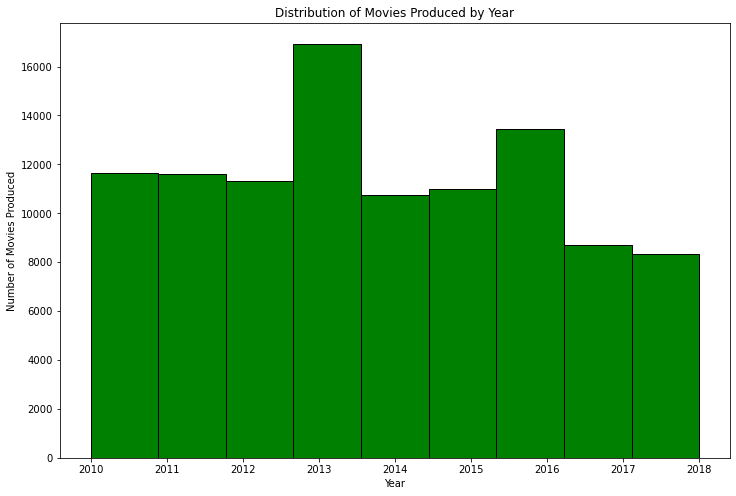

In [9]:
# Plot a histogram showing distribution of movie production budgets
movies_per_year = df.groupby('year')['movie_id'].count()

plt.figure(figsize=(12, 8))
plt.hist(movies_per_year.index, weights=movies_per_year.values, bins=len(movies_per_year), color='green', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Number of Movies Produced')
plt.title('Distribution of Movies Produced by Year')
plt.show()